In [1]:
from Algorithm_Functions import *

#Main Libraries 
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
import scipy.io as io
import sys, os, time
import math
from scipy.fft import fft, fftfreq #Fourier
import pywt # Wavelet

from skimage.restoration import denoise_wavelet #Noise
import matplotlib.patheffects as PathEffects
import seaborn as sns
from sklearn.manifold import TSNE
import time

#from tensorflow.python.framework import ops
#import tensorflow as tf
#from tensorflow import keras # And the tf and keras framework, thanks to Google

#Extra Libraries 
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm
from scipy.spatial.distance import pdist, squareform
import random
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #I used sns.distplot because it has more manual properties than plt.hist()
from scipy.stats import pearsonr #includes the PCC function

### File Paths for BBB OPEN DATA
o_1 = "BBB_OPEN/2018_07_10-1-Results/Cavitation_data_121mV-NC_1-PRF_1.25kHz-burst_"
o_2 = "BBB_OPEN/2018_07_10-2-Results/Cavitation_data_121mV-NC_1-PRF_1.25kHz-burst_"
o_3 = "BBB_OPEN/2018_07_10-3-Results/Cavitation_data_121mV-NC_1-PRF_1.25kHz-burst_"
o_4 = "BBB_OPEN/2018_07_30-1-Results/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
o_5 = "BBB_OPEN/2018_07_30-2-Results/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
o_6 = "BBB_OPEN/2018_07_30-3-Results/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
o_7 = "BBB_OPEN/2018_08_06-1-Results/Cavitation_data_90mV-NC_1-PRF_3.75kHz-burst_"
o_8 = "BBB_OPEN/2018_09_06-5-Results/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"

### File Paths for BBB OPEN NOT OPEN DATA
c_1 = "BBB_NOT_OPEN/2018_07_10-4-Results/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
c_2 = "BBB_NOT_OPEN/2018_08_06-3-Results/Cavitation_data_90mV-NC_1-PRF_3.75kHz-burst_"
c_3 = "BBB_NOT_OPEN/2018_09_05-3-Results/Cavitation_data_60mV-NC_1-PRF_1.25kHz-burst_"
c_4 = "BBB_NOT_OPEN/2018_09_05-5-Results/Cavitation_data_60mV-NC_1-PRF_1.25kHz-burst_"
c_5 = "BBB_NOT_OPEN/2018_09_06-4-Results/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"

dp_1 = "D:/Ultrasound/Data/2019_02_04-10-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_2 = "D:/Ultrasound/Data/2019_02_04-8-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_3 = "D:/Ultrasound/Data/2019_02_04-9-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_4 = "D:/Ultrasound/Data/2019_03_13-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_5 = "D:/Ultrasound/Data/2019_04_05-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_6 = "D:/Ultrasound/Data/2019_04_05-2-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_7 = "D:/Ultrasound/Data/2019_04_05-3-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_8 = "D:/Ultrasound/Data/2019_04_05-4-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_9 = "D:/Ultrasound/Data/2019_04_05-5-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_10 = "D:/Ultrasound/Data/2019_04_10-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_11 = "D:/Ultrasound/Data/2019_04_10-2-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_12 = "D:/Ultrasound/Data/2019_06_25-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_13 = "D:/Ultrasound/Data/2019_06_25-2-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_14 = "D:/Ultrasound/Data/2019_06_25-5-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_15 = "D:/Ultrasound/Data/2019_07_24-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_16 = "D:/Ultrasound/Data/2019_07_24-3-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_17 = "D:/Ultrasound/Data/2019_07_31-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_18 = "D:/Ultrasound/Data/2019_07_31-4-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_19 = "D:/Ultrasound/Data/2019_07_31-5-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_20 = "D:/Ultrasound/Data/2019_08_07-1-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_21 = "D:/Ultrasound/Data/2019_08_07-3-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_22 = "D:/Ultrasound/Data/2019_09_11-2-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_23 = "D:/Ultrasound/Data/2019_10_17-2-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"
dp_24 = "D:/Ultrasound/Data/2019_10_17-3-Results/RAW_data/Cavitation_data_90mV-NC_1-PRF_1.25kHz-burst_"

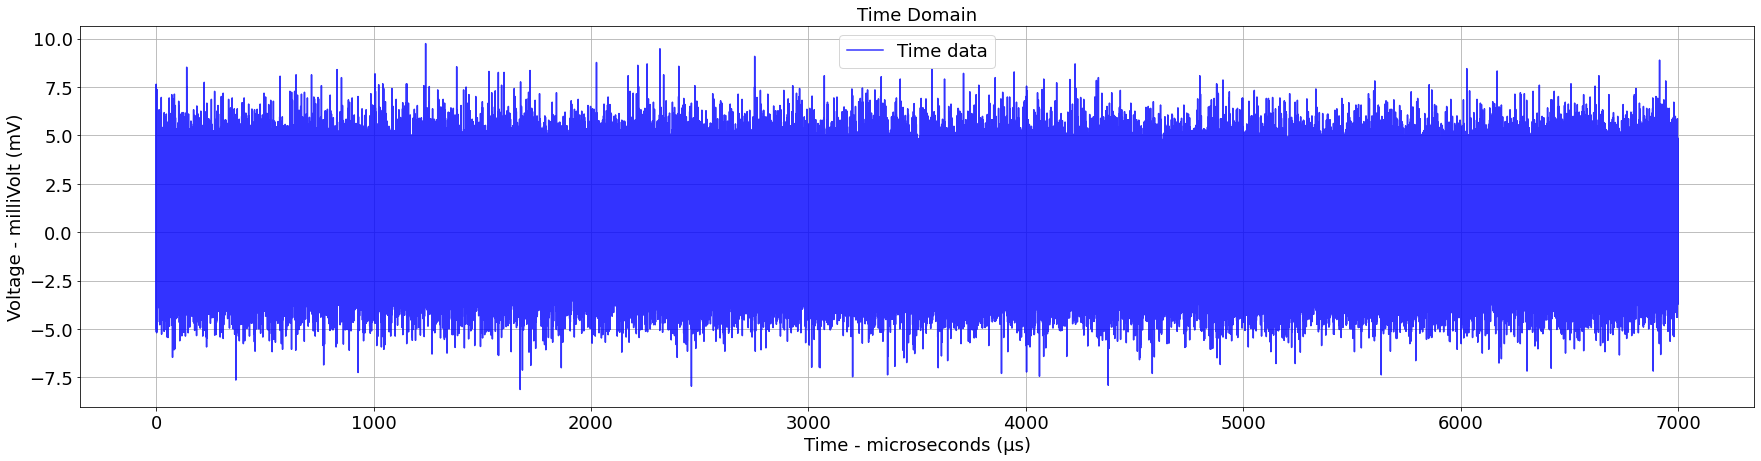

In [4]:
#------------------------------------------------------------------------------- PLOT 1: Raw Data
signal = Read_Raw_Bursts(40,41,dp_20)
Plot_Time_Signal(signal)

#------------------------------------------------------------------------------- PLOT: FFT
#Plot_FFT_Signal(signal,False)

In [4]:
frame_size = 1000
sub_array_size=100
widths = np.arange(5, 185) 
bandwidth = 0.8
center_frequency = 3.0
Plot_Frame_Time_FFT_CTW(spikes_list_location,burst_data,frame_size,sub_array_size,widths,bandwidth,center_frequency)

NameError: name 'spikes_list_location' is not defined

100%|██████████| 1/1 [00:00<00:00, 24.98it/s]


(1, 699984)


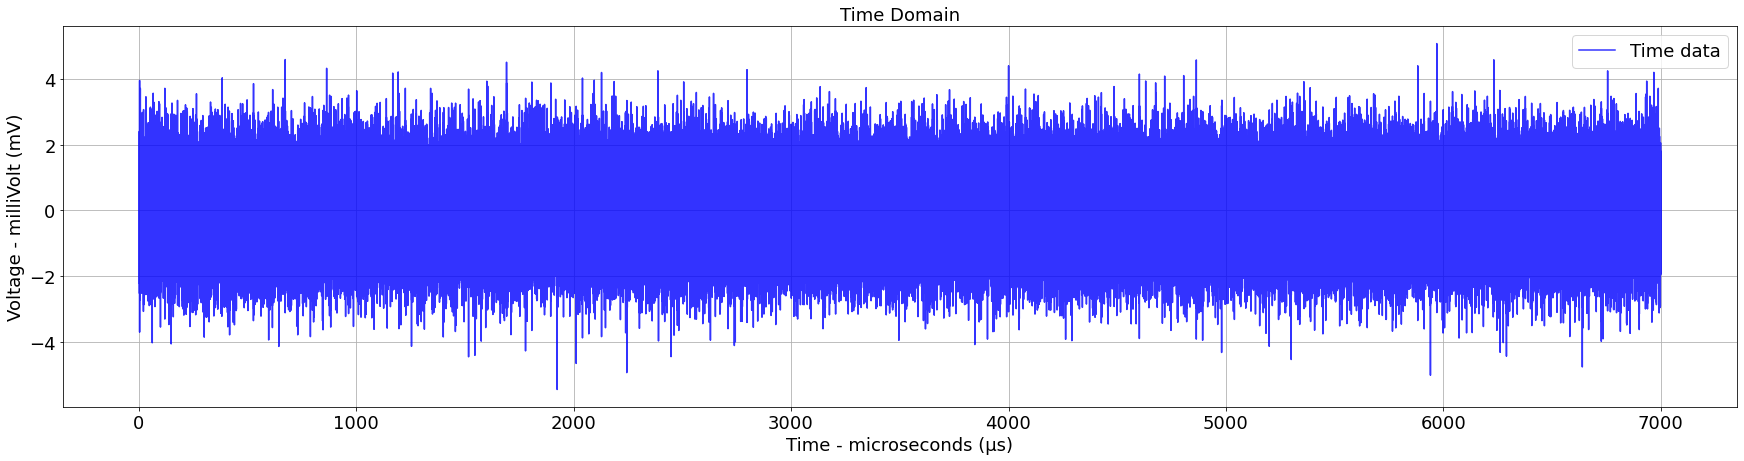

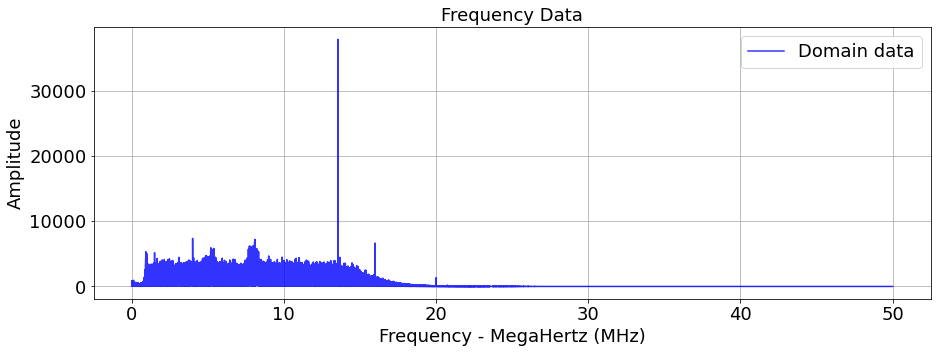

In [6]:
denoised_signal = Read_FrequencyDenoise_Bursts_Split(15,16,dp_20,1000000,15000000)
print(denoised_signal.shape)
Plot_Time_Signal(denoised_signal[0])

#------------------------------------------------------------------------------- PLOT: FFT
Plot_FFT_Signal(denoised_signal[0],False)

100%|██████████| 3/3 [00:00<00:00, 18.95it/s]


(3, 1100000)


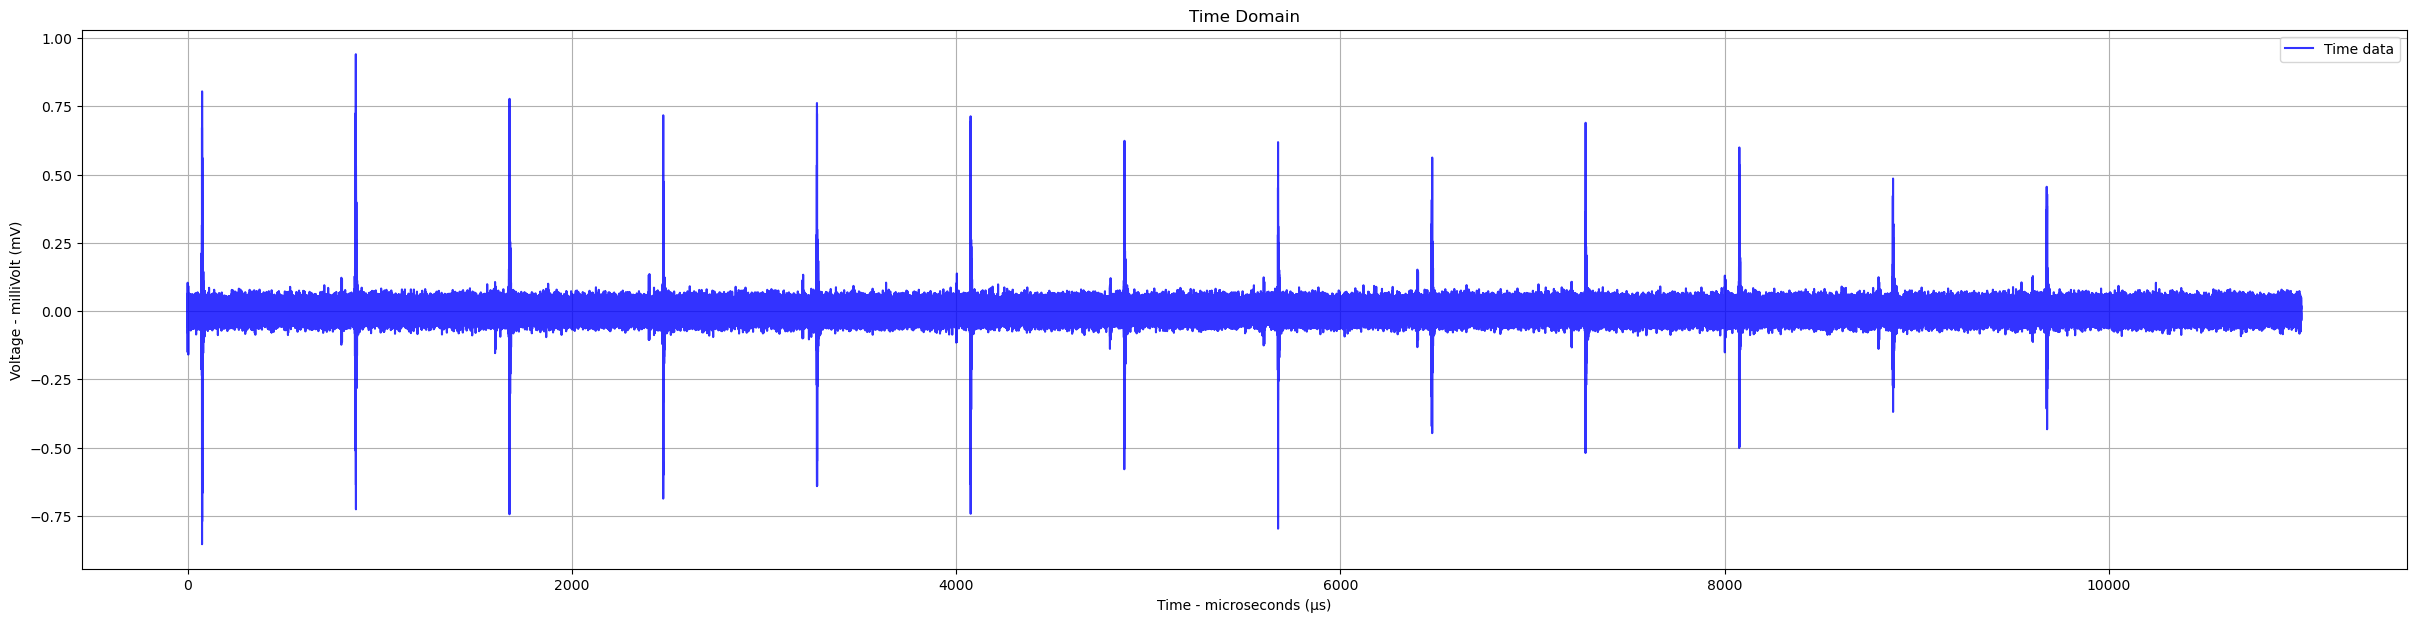

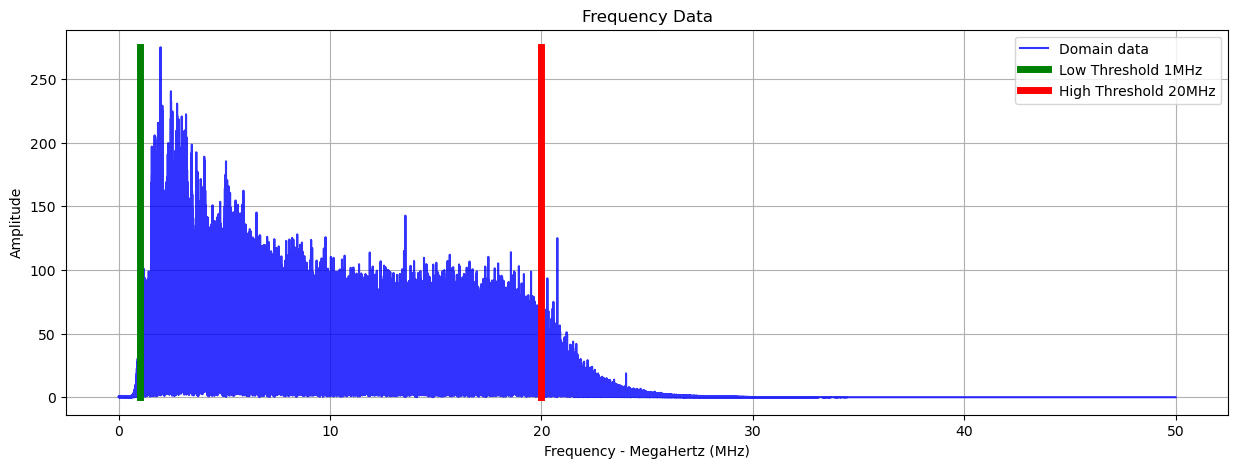

In [4]:
denoised_signal = Read_FrequencyDenoise_Normalize_Bursts_Split(52,55,o_1,1000000,20000000)
print(denoised_signal.shape)
Plot_Time_Signal(denoised_signal[0])

#------------------------------------------------------------------------------- PLOT: FFT
Plot_FFT_Signal(denoised_signal[0],True)

100%|██████████| 1/1 [00:00<00:00, 16.35it/s]


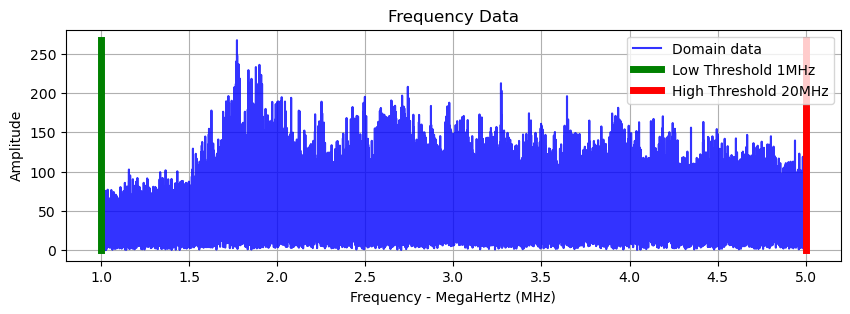

100%|██████████| 1/1 [00:00<00:00, 14.02it/s]


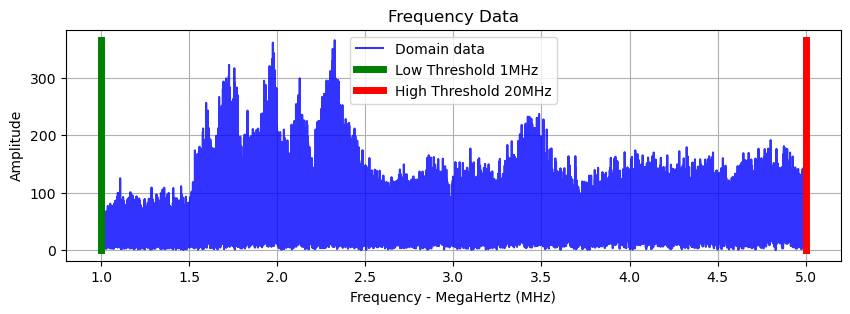

100%|██████████| 1/1 [00:00<00:00, 18.36it/s]


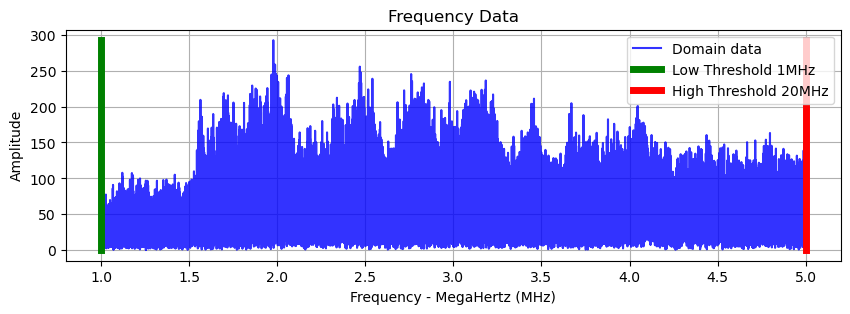

100%|██████████| 1/1 [00:00<00:00, 11.47it/s]


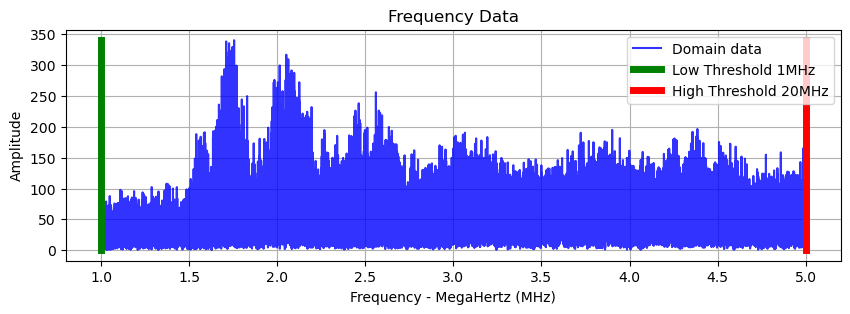

100%|██████████| 1/1 [00:00<00:00, 12.14it/s]


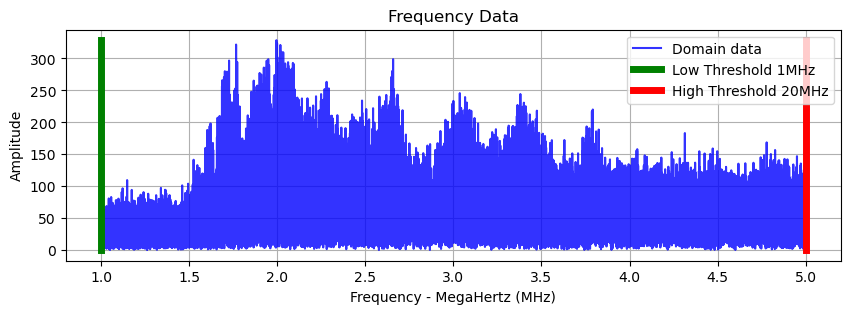

100%|██████████| 1/1 [00:00<00:00, 13.99it/s]


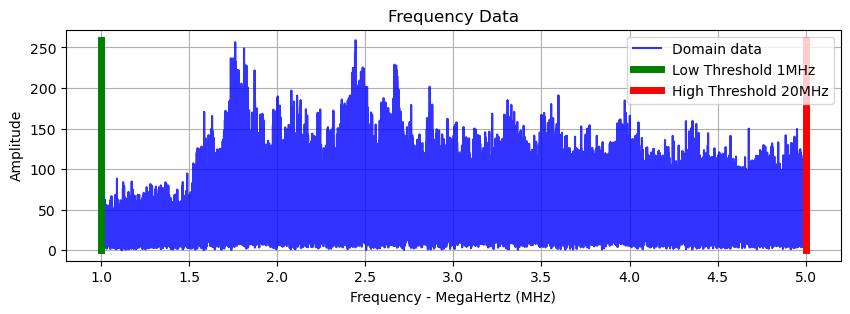

100%|██████████| 1/1 [00:00<00:00, 14.95it/s]


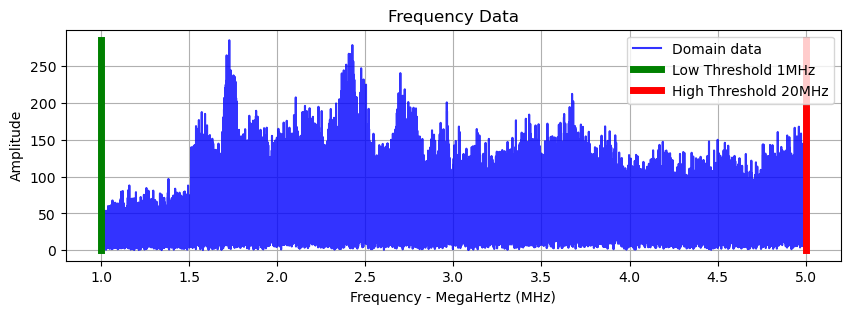

100%|██████████| 1/1 [00:00<00:00, 16.63it/s]


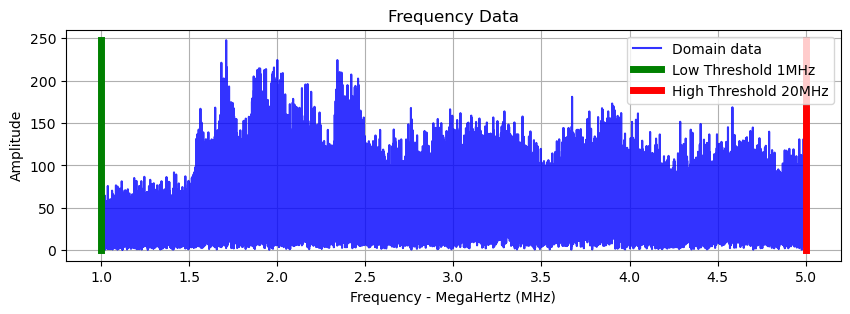

100%|██████████| 1/1 [00:00<00:00, 13.82it/s]


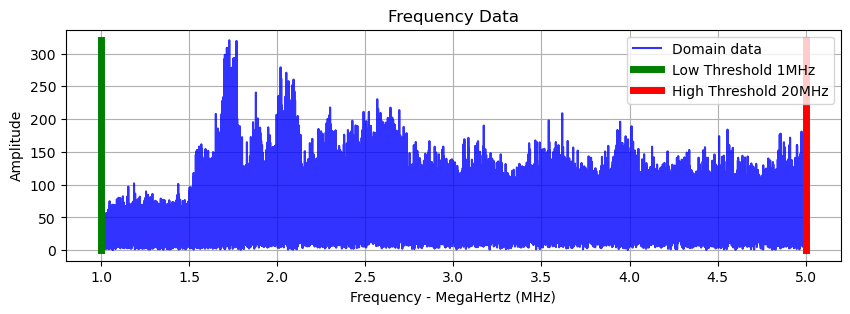

100%|██████████| 1/1 [00:00<00:00, 14.05it/s]


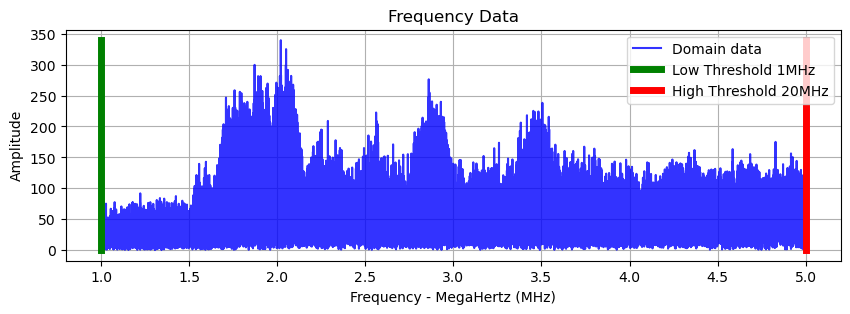

In [35]:
#---------------------------- This function we create and plot the fft domain of a signal with sampling 100MHz
def Plot_FFT_Signal_Histogram(signal,thresholds):
    n = len(signal) # Number of samples 
    sample_Rate = 100000000  # in Hertz <-- (100MHz)
    sample_Rate = sample_Rate / 1000000 # in MegaHz
    threshold_frequency_down = 1 # in MegaHz
    threshold_frequency_up = 5 # in MegaHz
    frequencies = fftfreq(n, 1/sample_Rate)
    down_threshold = 0
    while (frequencies[down_threshold]<threshold_frequency_down):
        down_threshold +=1
    up_threshold = 0
    while (frequencies[up_threshold]<threshold_frequency_up):
        up_threshold +=1
    spectrum = numpy.fft.fft(signal) 
    plt.figure(figsize=(10,3))
    #plt.hist(numpy.abs(spectrum[down_threshold:up_threshold]), bins = 500)
    plt.plot(frequencies[down_threshold:up_threshold],numpy.abs(spectrum[down_threshold:up_threshold]), alpha=0.8, color='blue',label="Domain data")
    max_val = numpy.max(numpy.abs(spectrum[1:n//2]))
    if(thresholds==True):
        plt.plot([frequencies[down_threshold],frequencies[down_threshold]], [0,max_val], linewidth=5, color='green',label="Low Threshold 1MHz")
        plt.plot([frequencies[up_threshold],frequencies[up_threshold]], [0,max_val], linewidth=5, color='red',label="High Threshold 20MHz")
    plt.legend()
    plt.grid()
    plt.title("Frequency Data")
    plt.ylabel("Amplitude")
    plt.xlabel("Frequency - MegaHertz (MHz)")
    plt.legend()
    plt.show()
    
for i in range(50,60):
    denoised_signal = Read_FrequencyDenoise_Normalize_Bursts_Split(i,i+1,o_1,1000000,20000000)
    Plot_FFT_Signal_Histogram(denoised_signal[0],True)